# Notebook for Part 1 - Exploration and Preprocessing

In [5]:
# Import Matplotlib and Seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import Pandas and NumPy functionality for editing data
import pandas as pd
import numpy as np

# Importing IPython display for visualizing intermediate results in the notebook
from IPython.display import display

# 1.a) Question: Import the log and give shape

In [4]:
#Loads the data from the CSV file as a Pandas DataFrame
df = pd.read_csv('heart_disease_raw.csv')

#Displays the first and last 5 rows of the DataFrame, count of rows and columns and the data types of each column
display(df)
display(df.dtypes)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

## 1.b) Question Basic Statistics

In [80]:
display(df.describe())

#screenshot in report

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


## 1.c) Question about the interpretation of mean of num

#This number shows that most values in the num column are likely very close to 0.996. Considering that the median is 1, which is slightly larger than the mean, the distribution appears to be skewed, suggesting it is denser towards the left due to variability or potential outliers on that side. Therefore, the mean alone is not enough to capture the data's distribution, and metrics like the median, alongside the mean, can better represent the distribution.

## 1.d) Question: Class imbalance female, male

In [ ]:
#lecture slides
counts = df['sex'].value_counts()
print(f"Count of each value in 'sex' feature:\n{counts}")

Count of each value in 'sex':
sex
Male      726
Female    194
Name: count, dtype: int64


In [ ]:
##Name the two sampling approaches? 
##since we want to balance out their representation, we can use undersampling or oversampling.

## 1.e) Question: Distribution target feature

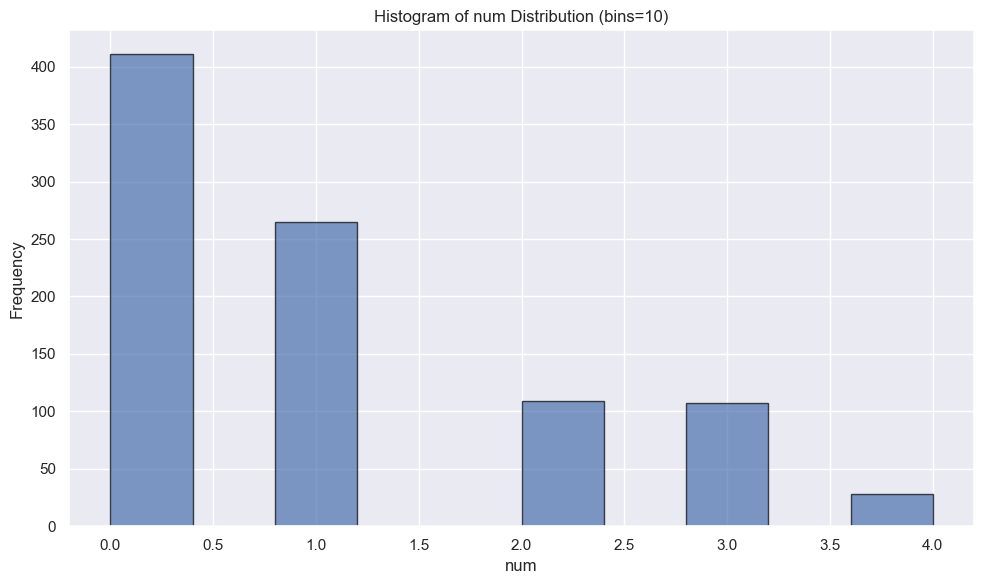

Mode of 'num' feature: 0    0
Name: num, dtype: int64


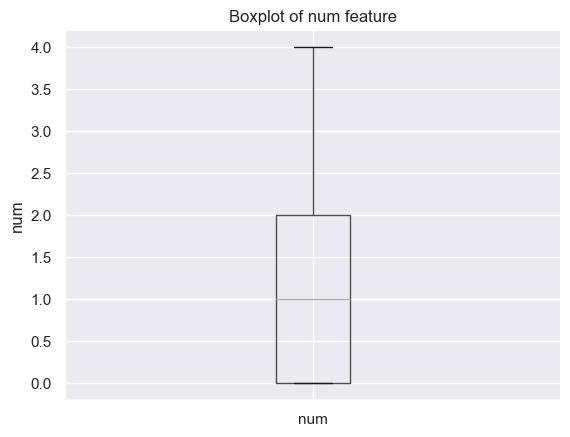

In [91]:
#sns.barplot(x="id", y="num", data=df['num'])

#Plotting the distribution of the 'num' feature
# Function to plot the histogram with a parameterized number of bins
bins =10
plt.figure(figsize=(10, 6))
plt.hist(df['num'], bins=bins, edgecolor='black', alpha=0.7)

# Adding labels and title
plt.xlabel('num')
plt.ylabel('Frequency')
plt.title(f'Histogram of num Distribution (bins={bins})')

# Displaying the plot
plt.tight_layout()
plt.show()

mode_value = df['num'].mode()
print(f"Mode of 'num' feature: {mode_value}")

# Plotting the boxplot of the 'num' feature
df.boxplot(column='num')
plt.title('Boxplot of num feature')
plt.ylabel('num')
plt.show()

## 1.f) Question: Binning

Minimum value: 60.0
Maximum value: 202.0
Number of bins: 15


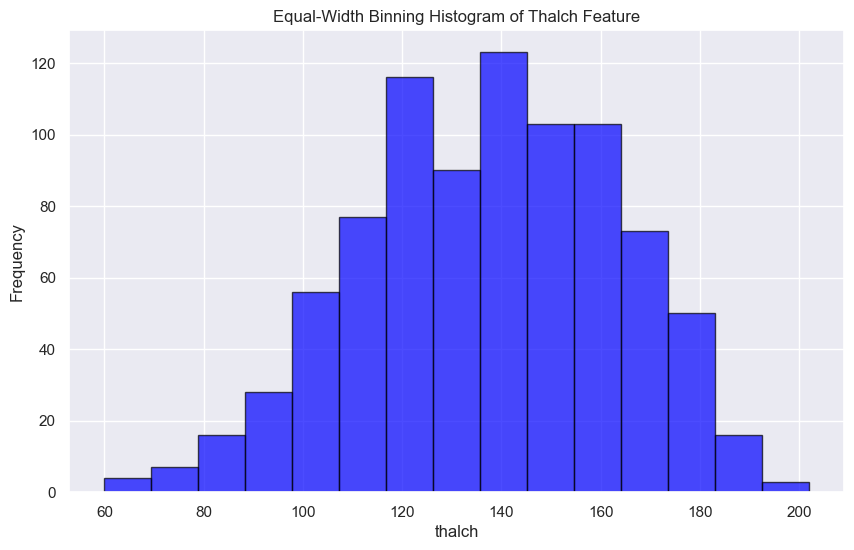

In [69]:
thalch_vals = df['thalch']

# Determine the range of the bins
min_val = thalch_vals.min()
max_val = thalch_vals.max()
print(f'Minimum value: {min_val}')
print(f'Maximum value: {max_val}')

# Determine the number of data points
n = len(df['thalch'])

# Determine the number of bins, basically playing around with the number of bins to see which one fits the data best

#Rice Rule
#num_bins = int(2 * n**(1/3))
#Sturges' Rule
#num_bins = int(np.log2(n) + 1)
#Scott's Rule
num_bins = int((max_val - min_val) / (3.5 * thalch_vals.std() / n**(1/3)))
#Freedman-Diaconis' Rule
#num_bins = int((max_val - min_val) / (2 * thalch_vals.quantile(0.75) - thalch_vals.quantile(0.25) / n**(1/3)))

#num_bins = 50 
print(f'Number of bins: {num_bins}') 

# Create equal-width bins
bins = np.linspace(min_val, max_val, num_bins + 1)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(thalch_vals, bins=bins, edgecolor='black', color='blue', alpha=0.7)
plt.title('Equal-Width Binning Histogram of Thalch Feature')
plt.xlabel('thalch')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Number of bins: 15
#I started using different numbers for bins, and I realized numbers larger than 20 are not adding detail to the data.
#I searched for different methods and found that Scott's Rule is a good method to determine the number of bins for
# the distribution of thalch values.
#Result is a multimoal distribution histogram and it has two peaks.

## 1.g) Question: Correlation

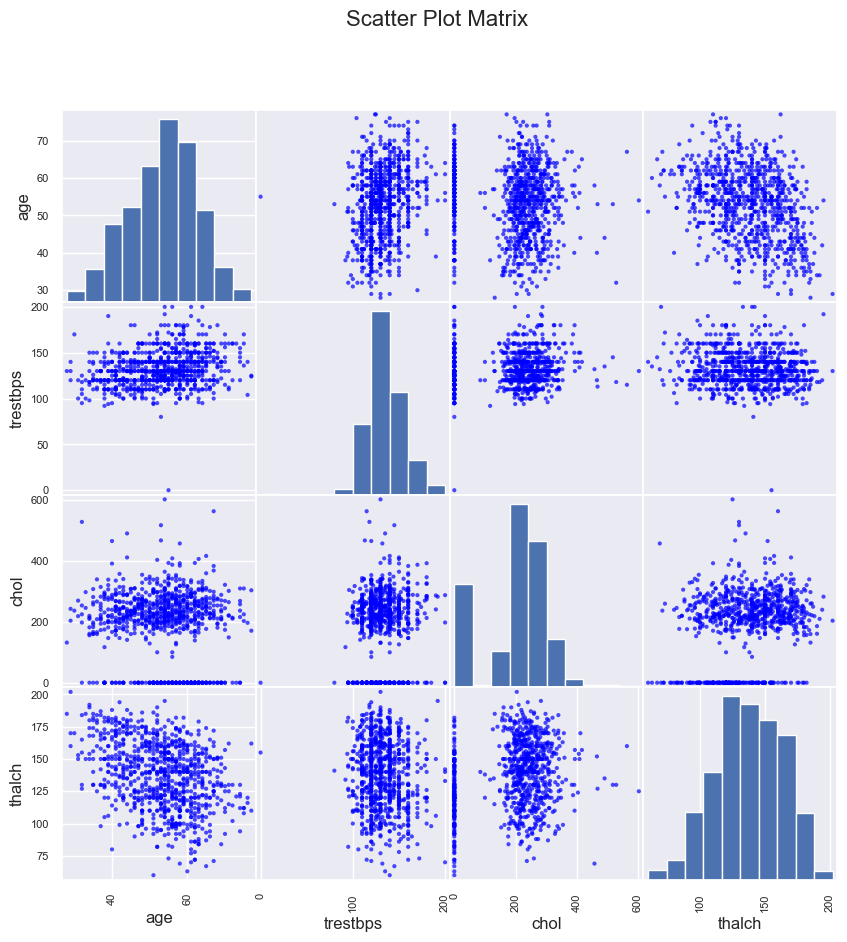

In [75]:
from pandas.plotting import scatter_matrix

# Select the features to be plotted
selected_features = ['age', 'trestbps', 'chol', 'thalch']

# Plot the scatter matrix
scatter_matrix(df[selected_features], figsize=(10, 10), alpha=0.7, diagonal='hist', color='blue')

# Add a title to the scatter plot matrix
plt.suptitle("Scatter Plot Matrix", fontsize=16)
plt.show()

## 1.h) Question: Correlation

               age  trestbps      chol    thalch
age       1.000000  0.244253 -0.086234 -0.365778
trestbps  0.244253  1.000000  0.092853 -0.104899
chol     -0.086234  0.092853  1.000000  0.236121
thalch   -0.365778 -0.104899  0.236121  1.000000


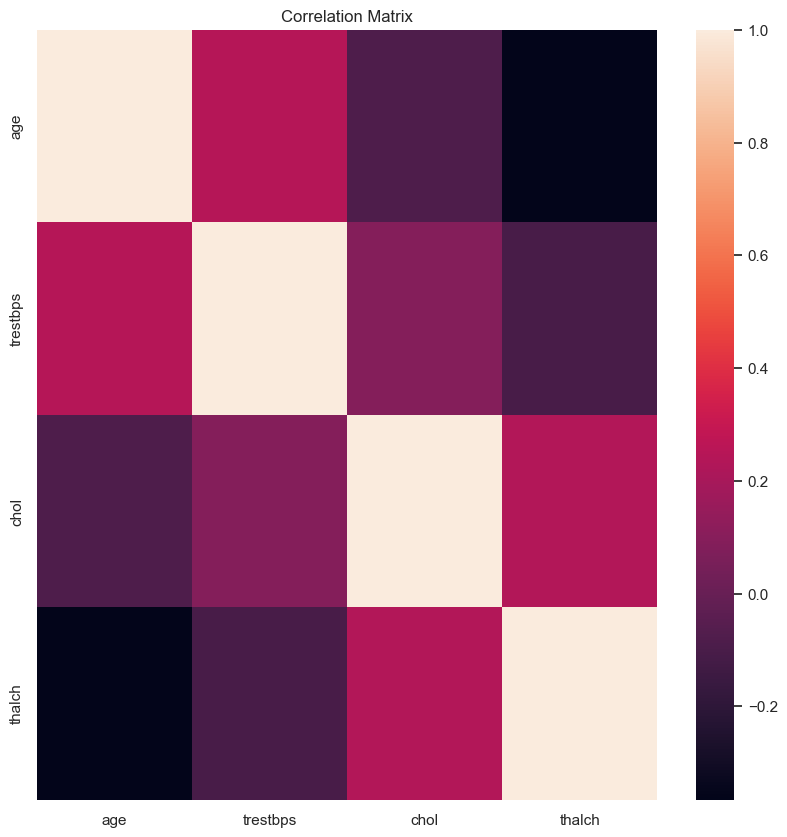

In [79]:
# Calculate the correlation matrix
correlation_matrix = df[selected_features].corr(numeric_only=True)
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix)

plt.title("Correlation Matrix")
plt.show()

In [ ]:
#The correlation between age and thalch is -0.39, which is a weak negative correlation. It means that as age increases,
# the maximum heart rate decreases. (r < 0 shows negative relationship between variables)

## 1.i) Question Boxplot Interpretation
#We can compare the boxplot, but cannot draw precise conclusion.
#Female: median is slightly above the median in male boxplot. similar to 1.c this boxplot is also skewed towards left which means mean (or average) < median. There are some outliers and some of them are below the lower fence. 
#Male: it is almost symmetrical, which means median is close to mean. However, there are more outliers above the upper fence which increases the average. so here avergae > median.
#But we don't know exactly if the mean of female which is lower than median of female will also be lower than the mean in male. I did an estimation with rounded numbers for quartiles and whiskers, it seems that male mean is slightly higher than female. But this could not be drawn by just looking at the boxplots.

No.

Cannot be answered. The number of outliers below the lower whisker in female group is unclear (apparently there are more than one).
Yes.



## 1.j) Question: NANs per feature

In [ ]:
#Total number of NaN values: 1759
#fbs feature has the most NaNs: 692
#Lower bound: minimum number of rows that must contain NaNs if they are densely packed. -> 920 - 46 = 874
#Upper bound: maximum number of rows that must contain NaNs if they are spread out in rows. -> 920 (Adding up the NaNs in 
# total will exceed the total number of rows, so the upper bound is 920.)

In [83]:
print(f'Total number of NaN values: {df.isna().sum().sum()}')

# Creating a temporary dataframe that indicates the zero values of chosen features
df_tmp = df[['id', 'age', 'sex', 'dataset', 'cp' ,'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']] == 0

# Showing the entries in the original dataframe that have a zero value for any of the chosen features
display(df.loc[df_tmp.any(axis=1)])

# Showing the number of NaNs per feature
print("Features' NaNs")
display(df_tmp.sum(axis=0))

# Showing the number of NaNs per entry
print('Number of NaNs per entry')
display(df_tmp.sum(axis=1).value_counts())

print(f'Total number of rows: {len(df_tmp.index)}')

# Removing the created overview dataframe
del df_tmp

Total number of NaN values: 1759


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


Features' NaNs


id            0
age           0
sex           0
dataset       0
cp            0
trestbps      1
chol        172
fbs         692
restecg       0
thalch        0
exang       528
oldpeak     370
slope         0
ca          181
thal          0
num         411
dtype: int64

Number of NaNs per entry


4    246
2    215
1    200
3    162
5     51
0     46
Name: count, dtype: int64

Total number of rows: 920


## 1.k) Question: Simple Remove NaNs

In [84]:
# Count the number of rows and columns in the original dataset
print(df.shape)

# Drop rows with missing values
df_tmp = df.dropna()

# Count the number of rows and columns left in the dataset
print(df_tmp.shape)

(920, 16)
(299, 16)
